# Kernel PCA

**Introducción:**

El Análisis de Componentes Principales (PCA) es una técnica de reducción de dimensionalidad ampliamente utilizada para simplificar conjuntos de datos complejos. Sin embargo, PCA se limita a datos lineales, lo que restringe su aplicación en escenarios donde las relaciones entre las variables son no lineales. Aquí es donde entra en juego **Kernel PCA**, una poderosa extensión de PCA que permite la transformación de datos no lineales a un espacio de características lineal.

**Funcionamiento:**

Kernel PCA funciona mediante la proyección de datos no lineales en un espacio de características de alta dimensión utilizando una función **kernel**. Esta función transforma los datos originales de una manera que resalta las relaciones no lineales, permitiendo que PCA identifique componentes lineales en este nuevo espacio de alta dimensión.

**Comparación con PCA:**

- **PCA:** Asume relaciones lineales entre las variables.
- **Kernel PCA:** Maneja relaciones no lineales mediante una función kernel.

**Ventajas:**

- **Flexibilidad:** Kernel PCA se adapta a una amplia gama de relaciones no lineales al elegir la función kernel adecuada.
- **Interpretabilidad:** Al igual que PCA, Kernel PCA proporciona componentes lineales en el espacio de características de alta dimensión, facilitando la interpretación de los resultados.
- **Eficiencia:** Existen algoritmos eficientes para calcular Kernel PCA, haciéndolo viable para conjuntos de datos grandes.

**Aplicaciones:**

- **Visualización de datos:** Kernel PCA puede utilizarse para visualizar datos de alta dimensión en un espacio de menor dimensión, facilitando su análisis e interpretación.
- **Detección de anomalías:** Kernel PCA puede identificar patrones inusuales en los datos, siendo útil para la detección de fraudes o fallos en sistemas.
- **Aprendizaje automático:** Kernel PCA puede servir como preprocesamiento para algoritmos de aprendizaje automático, mejorando su rendimiento en tareas de clasificación y regresión.


Imaginemos un conjunto de datos que representa la relación entre la edad y la altura de personas. PCA tradicional podría identificar dos componentes principales: uno para la edad y otro para la altura. Sin embargo, si la relación entre edad y altura no es lineal, Kernel PCA podría identificar componentes no lineales que capturan mejor las características subyacentes de los datos.

Kernel Principal Component Analysis (Kernel PCA) es una extensión no lineal del análisis de componentes principales (PCA) que utiliza un truco de kernel para proyectar datos no linealmente separables a un espacio de alta dimensionalidad donde se pueden aplicar técnicas linealmente separables. 

### Paso 1: Entender el Kernel PCA

Kernel PCA lleva a cabo una transformación no lineal utilizando funciones de kernel como:

- Kernel Lineal
- Kernel Polinómico
- Kernel Radial Basis Function (RBF)
- Kernel Sigmoide

Cada uno de estos núcleos tiene diferentes propiedades y se eligen en función de las características de los datos.

### Matemáticas detrás de Kernel PCA

#### Función de Kernel
Un kernel es una función que toma dos vectores como entrada y devuelve su producto escalar en un espacio de características de mayor dimensionalidad. Algunos ejemplos comunes de kernels son el kernel lineal, el kernel polinomial y el kernel gaussiano (RBF).

#### Transformación de Kernel
Dado un conjunto de datos $\{x_1, x_2, ..., x_n\} $, la transformación de kernel se define como:
$ K(x_i, x_j) = \phi(x_i)^T \phi(x_j) $
Donde:
- $ K(x_i, x_j) $ es el producto escalar en el espacio de características de mayor dimensionalidad.
- $ \phi(x_i) $ y $ \phi(x_j) $ son las representaciones de los vectores $ x_i $ y $ x_j $ en el espacio de características de mayor dimensionalidad.

#### Instalar Librerías Necesarias

Primero, asegúrate de tener installadas las librerías necesarias. Puedes utilizar `pip` para instalar cualquiera de ellas si no las tienes.

```bash
numpy matplotlib scikit-learn
```

Generar un conjunto de datos no linealmente separables utilizando `make_moons` o `make_circles` de `sklearn`.


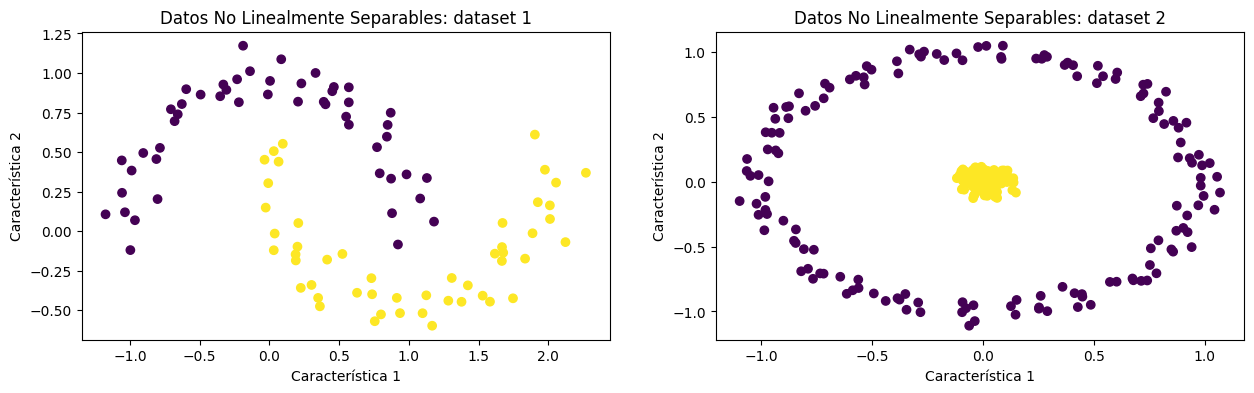

In [42]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons
from sklearn.datasets import make_circles

# Generar datos de prueba
#dataset 1
X1, y1 = make_moons(n_samples=100, noise=0.1, random_state=42)
#dataset 2
X2, y2 = make_circles(n_samples=300, factor=0.01, noise=0.05, random_state=42)
# Visualizar los datos
plt.figure(figsize=(15, 4))
plt.subplot(121)
plt.scatter(X1[:, 0], X1[:, 1], c=y1, cmap='viridis')
plt.title("Datos No Linealmente Separables: dataset 1")
plt.xlabel("Característica 1")
plt.ylabel("Característica 2")

plt.subplot(122)
plt.scatter(X2[:, 0], X2[:, 1], c=y2, cmap='viridis')
plt.title("Datos No Linealmente Separables: dataset 2")
plt.xlabel("Característica 1")
plt.ylabel("Característica 2")
plt.show()

### **Explorar PCA lineal**

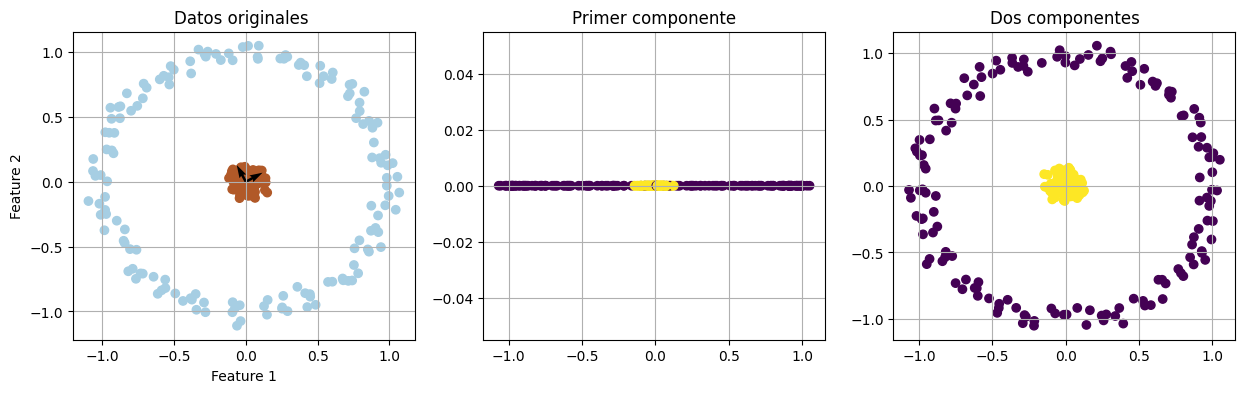

In [49]:
from sklearn.decomposition import PCA
# Fit on a PCA object
pca = PCA(n_components=2)

X_data = X2 #cambiar por x1 o x2
y_data = y2 #cambiar por y1 o y2
X_pca = pca.fit_transform(X_data)

plt.figure(figsize=(15, 4))
plt.subplot(131)
plt.scatter(X_data[:, 0], X_data[:, 1], c=y_data, cmap=plt.cm.Paired)
plt.title('Datos originales ')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.quiver([0,0],[0,0], pca.components_[0,:], pca.components_[1,:], label="eigenvectors")
plt.grid(True)

plt.subplot(132)
plt.scatter(X_pca[:,0],np.zeros(X_pca[:,0].shape[0]),c=y_data,cmap='viridis')
plt.title("Primer componente")
plt.grid(True)


plt.subplot(133)
plt.scatter(X_pca[:,0],X_pca[:,1],c=y_data,cmap='viridis')
plt.title("Dos componentes")
plt.grid(True)

#### **Transformación de Kernel**
Por ejemplo, podemos usar la siguiente transformación polinomica:  $ϕ(x)=[x_1,x_2,x_1^2+x_2^2]$ donde $x=[x_1,x_2]$


Text(0.5, 0, '$x_{1}^2+x_{2}^2$')

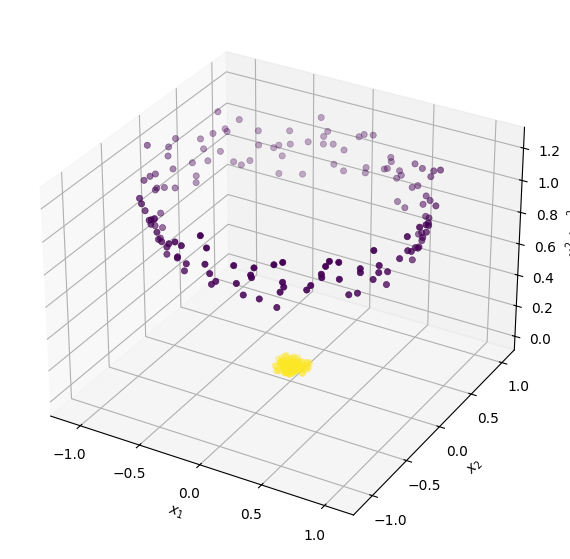

In [50]:
PHI_train=np.concatenate((X_data, (X_data**2).sum(axis=1).reshape(-1,1)),axis=1)

fig = plt.figure(figsize=(7,7))
ax = fig.add_subplot(projection='3d')
ax.scatter(PHI_train[:,0], PHI_train[:,1],  PHI_train[:,2], c=y_data, cmap='viridis', linewidth=0.5);
ax.set_xlabel('$x_{1}$')
ax.set_ylabel('$x_{2}$')
ax.set_zlabel('$x_{1}^2+x_{2}^2$')


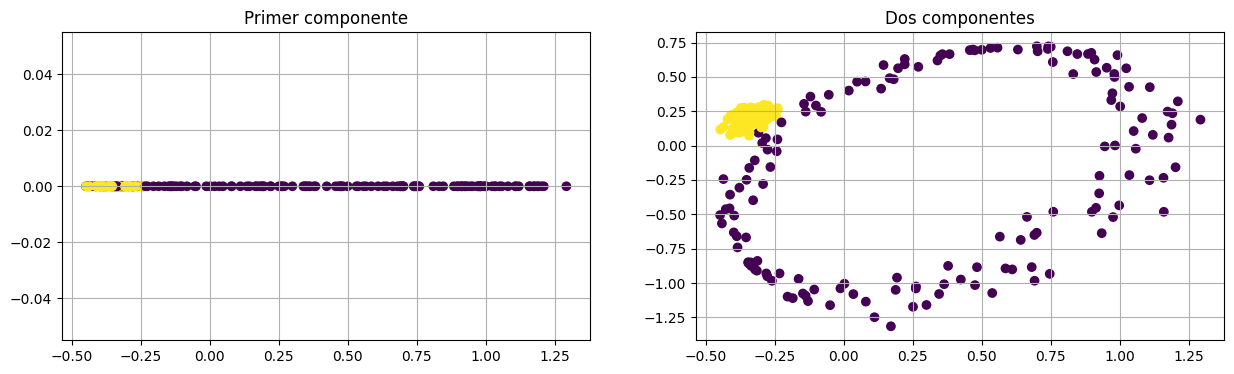

In [51]:
#Aplicar PCA sobre los datos transformados
pca = PCA(n_components=2)
X_kpca = pca.fit_transform(PHI_train)


plt.figure(figsize=(15, 4))
plt.subplot(121)
plt.scatter(X_kpca[:,0],np.zeros(X_kpca[:,0].shape[0]),c=y_data,cmap='viridis')
plt.title("Primer componente")
plt.grid(True)


plt.subplot(122)
plt.scatter(X_kpca[:,0],X_kpca[:,1],c=y_data,cmap='viridis')
plt.title("Dos componentes")
plt.grid(True)


# KPCA
### 1. Función de Kernel

El primer paso en Kernel PCA es definir una función de kernel. Un kernel es una función que calcula el producto escalar entre dos vectores en un espacio de características de mayor dimensionalidad. La elección del kernel depende del problema y puede incluir el kernel lineal, el kernel polinomial y el kernel gaussiano (RBF), entre otros.

Para un par de vectores $ x $ y $ y$, la función de kernel se denota comúnmente como $ k(x, y) $.

### 2. Matriz de Kernel

Una vez que se ha definido la función de kernel, se calcula la matriz de kernel $ K $. Esta matriz es simétrica y de tamaño $ n \times n $, donde $ n $ es el número de muestras en el conjunto de datos.

La entrada $ K_{ij} $ de la matriz de kernel representa el valor del kernel entre el $ i $-ésimo y el $ j $-ésimo vector de características en el conjunto de datos.


$
K=\begin{vmatrix}
k(\mathbf{x}\_1, \mathbf{x}\_1) & k(\mathbf{x}\_1, \mathbf{x}\_2)&\dots &  k(\mathbf{x}\_1, \mathbf{x}\_N) \\\\
k(\mathbf{x}\_2, \mathbf{x}\_1)  & k(\mathbf{x}\_2, \mathbf{x}\_2)  &\dots & k(\mathbf{x}\_2, \mathbf{x}\_N) \\\\
\vdots & \vdots & \ddots & \vdots \\\\
k(\mathbf{x}\_N, \mathbf{x}\_1)  & k(\mathbf{x}\_N, \mathbf{x}\_2)  &\dots & k(\mathbf{x}\_N, \mathbf{x}\_N) \\\\
\end{vmatrix}
$
### 3. Matriz Normalizada

Luego, se procede a normalizar la matriz de kernel. Esto se hace mediante la resta de dos términos:

- El primer término es la matriz $ \frac{1}{n} \mathbf{1} \mathbf{1}^T K $, donde $ \mathbf{1}$ es un vector de unos y $ n $ es el número de muestras. Este término es el promedio de los valores de la matriz de kernel a lo largo de las filas y columnas.
  
- El segundo término es la matriz $ K $. Este término asegura que los datos no se vean afectados por la normalización.

La matriz normalizada se denota como $ K_c $.

### 4. Autovalores y Autovectores

Una vez normalizada la matriz de kernel, se procede a calcular los autovalores y autovectores de esta matriz. Los autovalores y autovectores se obtienen de la descomposición espectral de la matriz centrada $K_c $.

### 5. Selección de Componentes Principales

Finalmente, se seleccionan los componentes principales basados en los autovalores asociados. Los autovectores correspondientes a los autovalores más grandes representan las direcciones de máxima varianza en el espacio de características de mayor dimensionalidad.

### 6. Proyección de los Datos

Los datos originales se proyectan en el espacio de características de mayor dimensionalidad utilizando los autovectores seleccionados como componentes principales.



**Una implementación en python**

In [52]:
import numpy as np

#  Definir la función de kernel (en este caso, el kernel gaussiano o RBF)
def gaussian_kernel(x, y, gamma=0.1):
    return np.exp(-gamma * np.linalg.norm(x - y)**2)


def poly_kernel(x, y, d=2):
    ##TODO: .... 
    return 

#  Calcular la matriz de kernel
def kernel_matrix(X, kernel_func):
    n_samples = X.shape[0]
    K = np.zeros((n_samples, n_samples))
    for i in range(n_samples):
        for j in range(n_samples):
            K[i, j] = kernel_func(X[i], X[j])
    return K

#  Calcular los autovalores y autovectores de la matriz de kernel
def kernel_pca(K, n_components):
    # Normalizar la matriz de kernel
    n_samples = K.shape[0]
    one_n = np.ones((n_samples, n_samples)) / n_samples
    K_normalized = K - one_n.dot(K) - K.dot(one_n) + one_n.dot(K).dot(one_n)
    
    # Obtener los eigenvalores y eigenvectores de la matriz de kernel normalizada
    eigenvalues, eigenvectors = np.linalg.eigh(K_normalized)
    
    # Ordenar los eigenvectores por los eigenvalores descendentes
    idx = np.argsort(eigenvalues)[::-1]
    eigenvalues = eigenvalues[idx]
    eigenvectors = eigenvectors[:, idx]
    
    # Seleccionar los componentes principales
    components = eigenvectors[:, :n_components]
    explained_variance = eigenvalues[:n_components]
    
    return components, explained_variance

# Proyectar los datos en el espacio de características de mayor dimensionalidad
def project_data(X, components):
    return np.dot(X, components)



# Aplicar Kernel PCA a los datos

In [60]:
X_data = X1 #cambiar por x1 o x2
y_data = y1 #cambiar por y1 o y2


gamma = 10  # Parámetro del kernel gaussiano
n_components = 1  # Número de componentes principales
K = kernel_matrix(X_data, lambda x, y: gaussian_kernel(x, y, gamma))
components, explained_variance = kernel_pca(K, n_components)

# Paso 3.6: Proyectar los datos en el nuevo espacio de características
X_projected = project_data(K, components)

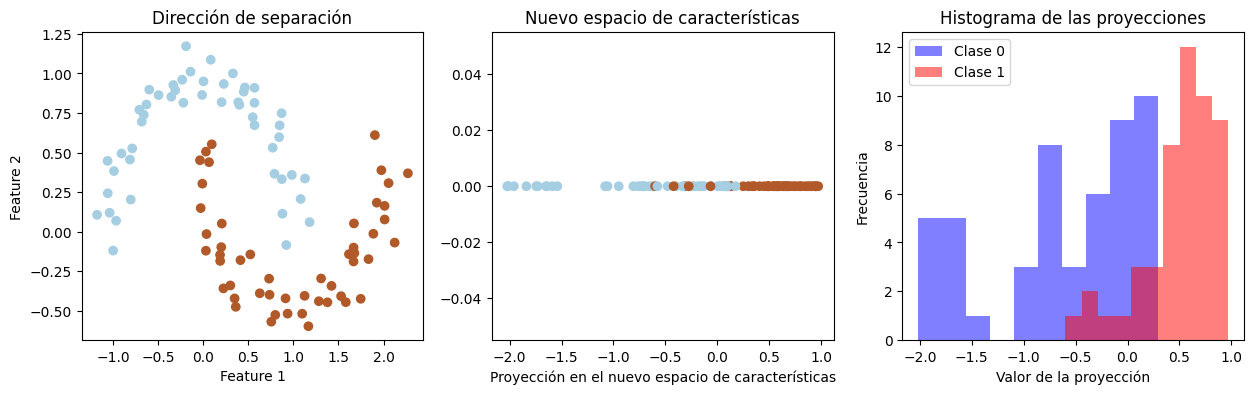

In [61]:
# Visualizar los datos y la dirección de separación
plt.figure(figsize=(15, 4))
plt.subplot(131)
plt.scatter(X_data[:, 0], X_data[:, 1], c=y_data, cmap=plt.cm.Paired)
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Dirección de separación')


plt.subplot(132)
plt.scatter(X_projected, np.zeros_like(X_projected), c=y_data, cmap=plt.cm.Paired)
plt.title('Nuevo espacio de características')
plt.xlabel('Proyección en el nuevo espacio de características')


plt.subplot(133)
plt.hist(X_projected[y_data == 0], color='b', alpha=0.5, label='Clase 0')
plt.hist(X_projected[y_data == 1], color='r', alpha=0.5, label='Clase 1')
plt.title('Histograma de las proyecciones')
plt.xlabel('Valor de la proyección')
plt.ylabel('Frecuencia')
plt.legend()

## Usar las herramientas de SKLEARN

In [63]:
X_data = X1 #cambiar por x1 o x2
y_data = y1 #cambiar por y1 o y2

#  Aplicar Kernel PCA
kpca = KernelPCA(kernel='rbf', gamma=10)
kpca.fit(X_data)
X_projected = kpca.transform(X_data)

Text(0.5, 0, 'Proyección en el nuevo espacio de características')

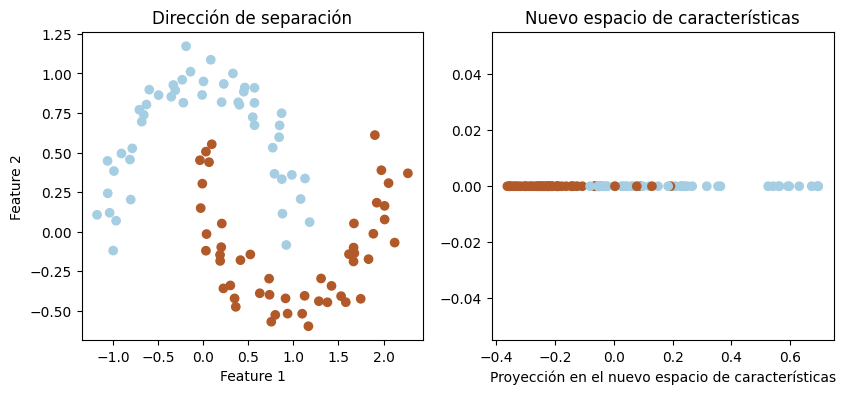

In [64]:
# Visualizar los datos y la dirección de separación
plt.figure(figsize=(15, 4))
plt.subplot(131)
plt.scatter(X_data[:, 0], X_data[:, 1], c=y_data, cmap=plt.cm.Paired)
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Dirección de separación')



plt.subplot(132)
plt.scatter(X_projected[:,0], np.zeros_like(X_projected[:,0]), c=y, cmap=plt.cm.Paired)
plt.title('Nuevo espacio de características')
plt.xlabel('Proyección en el nuevo espacio de características')

## Ejercicio

In [69]:
import pandas as pd
X_train_noisy = pd.read_csv('X_train_noisy.csv').to_numpy()
X_test_noisy = pd.read_csv('X_test_noisy.csv').to_numpy()




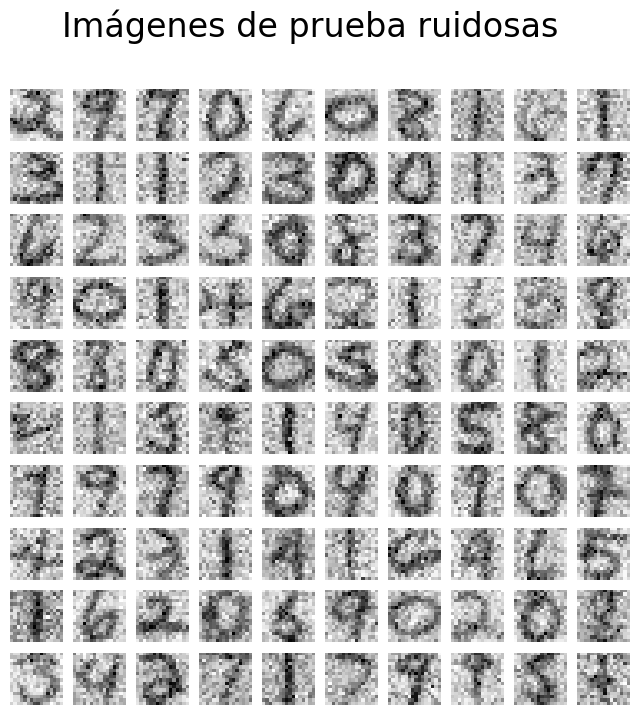

In [70]:
# Helper function for plotting the digit images
def plot_digits(X, title):
    """Small helper function to plot 100 digits."""
    fig, axs = plt.subplots(nrows=10, ncols=10, figsize=(8, 8))
    for img, ax in zip(X, axs.ravel()):
        ax.imshow(img.reshape((16, 16)), cmap="Greys")
        ax.axis("off")
    fig.suptitle(title, fontsize=24)
    
plot_digits(X_test_noisy, "Imágenes de prueba ruidosas")

## Exercicio 1 -  PCA & Kernel PCA 

Crear dos objetos, un objeto PCA y un objeto KernelPCA. Ajustar el parámetro n_components adecuadamente, para esto debe analizar la varianza acumulada. 


## Exercicio 2 -  Reconstruir digitos

Queremos investigar que técnica PCA o KPCA puede eliminar mejor el ruido de los digitos. APlicar transformada inversa.

## Exercicio 3 -  Visualizar datos

Visualizar los digitos reconstruidos usando PCA y comparar con los digitos reconstruidos usando KPCA